# Proyecto 1 - Data Science
## Integrantes
### Alejandra Guzman
### Eduardo Ramirez
### Jorge Caballeros
### Pablo Escobar 20936

## Analisis de datos crudos
Es crucial analizar los datos crudos de un dataset antes de iniciar el proceso de limpieza debido a que proporciona una comprensión profunda de la calidad y la integridad de los datos. Al revisar los datos en su forma original, se pueden identificar posibles errores, valores atípicos y patrones inesperados. Esta revisión previa permite a los analistas tomar decisiones informadas sobre cómo abordar los problemas de limpieza y prevenir sesgos o pérdida de información importante durante el proceso. Además, este análisis inicial es fundamental para definir estrategias adecuadas de preprocesamiento y transformación de datos, lo que garantiza que los resultados finales sean confiables y sólidos para el análisis posterior o la construcción de modelos.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# primero obtengo todos los archivos csv en el directorio csv_files que no sean el archivo all_institutes.csv
files = [file for file in os.listdir("./csv_files") if file.endswith('.csv') and file != 'all_institutes.csv']

print("Files to use:")
for file in files:
    print(file)

Files to use:
alta_verapaz.csv
baja_verapaz.csv
chimaltenango.csv
chiquimula.csv
ciudad_capital.csv
el_progreso.csv
escuintla.csv
guatemala.csv
huehuetenango.csv
izabal.csv
jalapa.csv
jutiapa.csv
peten.csv
quetzaltenango.csv
quiche.csv
retalhuleu.csv
sacatepequez.csv
santa_rosa.csv
san_marcos.csv
solola.csv
suchitepequez.csv
totonicapan.csv
zacapa.csv


In [57]:
# por cada archivo mostraremos la cantidad de filas y columnas que tiene
for file in files:
    print(" ")
    print("****************************************")
    print('Dataset: ' + file)
    print('Rows: ' + str(len(pd.read_csv('./csv_files/' + file))))
    print('Columns: ' + str(len(pd.read_csv('./csv_files/' + file).columns)))
    print("****************************************")


 
****************************************
Dataset: alta_verapaz.csv
Rows: 350
Columns: 17
****************************************
 
****************************************
Dataset: baja_verapaz.csv
Rows: 122
Columns: 17
****************************************
 
****************************************
Dataset: chimaltenango.csv
Rows: 351
Columns: 17
****************************************
 
****************************************
Dataset: chiquimula.csv
Rows: 174
Columns: 17
****************************************
 
****************************************
Dataset: ciudad_capital.csv
Rows: 1539
Columns: 17
****************************************
 
****************************************
Dataset: el_progreso.csv
Rows: 124
Columns: 17
****************************************
 
****************************************
Dataset: escuintla.csv
Rows: 601
Columns: 17
****************************************
 
****************************************
Dataset: guatemala.csv
Rows: 1437
C

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'CIUDAD CAPITAL'),
  Text(1, 0, 'GUATEMALA'),
  Text(2, 0, 'ESCUINTLA'),
  Text(3, 0, 'SAN MARCOS'),
  Text(4, 0, 'HUEHUETENANGO'),
  Text(5, 0, 'QUETZALTENANGO'),
  Text(6, 0, 'PETEN'),
  Text(7, 0, 'SUCHITEPEQUEZ'),
  Text(8, 0, 'IZABAL'),
  Text(9, 0, 'CHIMALTENANGO'),
  Text(10, 0, 'ALTA VERAPAZ'),
  Text(11, 0, 'JUTIAPA'),
  Text(12, 0, 'RETALHULEU'),
  Text(13, 0, 'SACATEPEQUEZ'),
  Text(14, 0, 'QUICHE'),
  Text(15, 0, 'CHIQUIMULA'),
  Text(16, 0, 'SANTA ROSA'),
  Text(17, 0, 'JALAPA'),
  Text(18, 0, 'SOLOLA'),
  Text(19, 0, 'EL PROGRESO'),
  Text(20, 0, 'BAJA VERAPAZ'),
  Text(21, 0, 'ZACAPA'),
  Text(22, 0, 'TOTONICAPAN')])

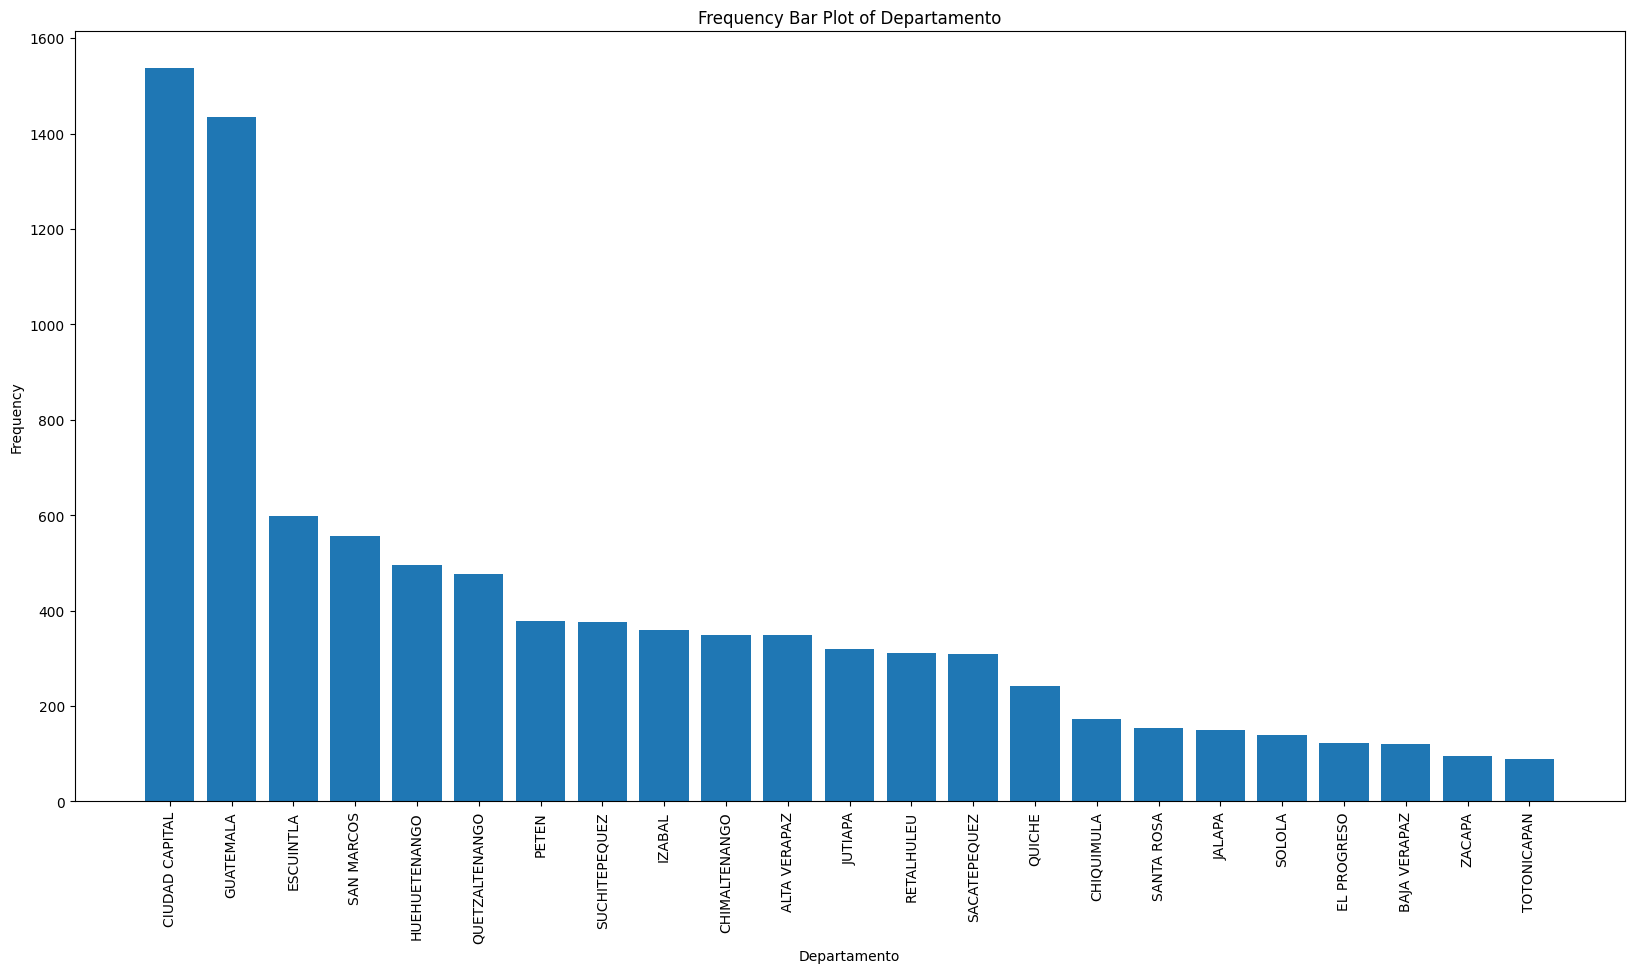

In [58]:
# Graficaremos la cantidad de institutos por cada departamento

all_dirty_data = pd.read_csv('csv_files/all_institutes.csv')


plt.figure(figsize=(20,10))
plt.title('Cantidad de institutos por departamento')
departamento_column = all_dirty_data['DEPARTAMENTO']

# Step 4: Get the unique values and their frequency using the pandas "value_counts()" function
departamento_freq = departamento_column.value_counts()

# Step 5: Plot the frequency bar plot using matplotlib's "bar()" function
plt.bar(departamento_freq.index, departamento_freq.values)

# Add labels and title for the plot
plt.xlabel('Departamento')
plt.ylabel('Frequency')
plt.title('Frequency Bar Plot of Departamento')
plt.xticks(rotation=90)



In [59]:
# Ahora mostraremos las variables utilizadas en el dataset:
columns = set()

for file in files:
    data = pd.read_csv('./csv_files/' + file)
    columns.update(data.columns)
    
# Cantidad de variables
print("\nCantidad de variables en el dataset: " + str(len(columns))+ "\n")
print("Variables: \n")
for i in range(len(columns)):
    print(str(i+1) + ". " + list(columns)[i])
    


Cantidad de variables en el dataset: 17

Variables: 

1. JORNADA
2. DISTRITO
3. PLAN
4. SUPERVISOR
5. STATUS
6. ESTABLECIMIENTO
7. MODALIDAD
8. TELEFONO
9. MUNICIPIO
10. DIRECTOR
11. SECTOR
12. AREA
13. DEPARTAMENTAL
14. DEPARTAMENTO
15. DIRECCION
16. CODIGO
17. NIVEL


In [60]:
# Fill missing values in all the datasets
for file in files:
    data = pd.read_csv('./csv_files/' + file)
    for column in data.columns:
        data[column].replace({"": "NaN", "-----": "NaN"}, inplace=True)
    data.to_csv('./csv_files/' + file, index=False)  # Save the updated DataFrame back to the CSV file


In [61]:
# summary breve del dataset de la ciudad capital
ciudad_capital = pd.read_csv('./csv_files/ciudad_capital.csv')
ciudad_capital.describe()


,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
count,1538,1470,1537,1537,1537,1532,1435,1470,1015,1537,1537,1537,1537,1537,1537,1537,1537
unique,1538,75,1,21,994,1044,837,66,642,1,4,3,3,2,6,11,4
top,00-01-0158-46,01-403,CIUDAD CAPITAL,ZONA 1,INSTITUTO AMERICANO EN CIENCIAS DE COMPUTACION,11 CALLE 3-59,22067425,CARLOS HUMBERTO GONZALEZ DE LEON,SIN DATO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),GUATEMALA NORTE
freq,1,234,1537,628,9,10,19,291,12,1537,1428,1530,927,1533,677,962,921


In [62]:
# Head de los datos de la ciudad capital
ciudad_capital.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,00-01-0158-46,01-312,CIUDAD CAPITAL,ZONA 1,COLEGIO TECNICO PROGRESISTA CETECPRO,2A. AVENIDA 3-59,22512759,AMADO SALOMON FLORES PEREZ,IRMA AMPARO TOLEDO HERNANDEZ,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,DOBLE,DIARIO(REGULAR),GUATEMALA NORTE
1,00-01-0173-46,01-312,CIUDAD CAPITAL,ZONA 1,INSTITUTO NORMAL PARA SEÑORITAS CENTRO AMERICA,1A CALLE 2-64,22323424,AMADO SALOMON FLORES PEREZ,INGRID MARIELA ESPINA ORELLANA DE ESCOBAR,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),GUATEMALA NORTE
2,00-01-0174-46,01-307,CIUDAD CAPITAL,ZONA 1,ESCUELA NACIONAL CENTRAL DE FORMACION SECRETARIAL,12 AVENIDA 9-27,22322985,NORMA ARACELY PALOMO FRANCO DE DIAZ,NaN,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),GUATEMALA NORTE
3,00-01-0175-46,01-317,CIUDAD CAPITAL,ZONA 1,ESCUELA NORMAL PARA MAESTROS DE EDUCACION MUSI...,2A. CALLE 4-04,22516651,MARIANO DOMINGO ESTRADA TELETOR,IRMA JANETH TOJ TOBIAS,DIVERSIFICADO,OFICIAL,URBANA,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,DIARIO(REGULAR),GUATEMALA NORTE
4,00-01-0176-46,01-312,CIUDAD CAPITAL,ZONA 1,INSTITUTO NACIONAL DE BACHILLERATO EN COMPUTACION,3A CALLE 15-45,22202223,AMADO SALOMON FLORES PEREZ,FREDY HUMBERTO GONZALEZ SANTISTEBAN,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),GUATEMALA NORTE
